In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"alamsyahahmad","key":"86b921911ba05d45f6a8c8d26cdf0b46"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:11<00:00, 24.1MB/s]
100% 225M/225M [00:11<00:00, 20.7MB/s]


In [3]:
import zipfile

path_to_zip_file = "/content/flowers-recognition.zip"
directory_to_extract_to = "/content/flowers"  # Ganti dengan path folder tujuan ekstraksi

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [4]:
import os
base_dir = '/content/flowers/flowers'

In [5]:
print(os.listdir(base_dir))

['dandelion', 'tulip', 'sunflower', 'daisy', 'rose']


In [6]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


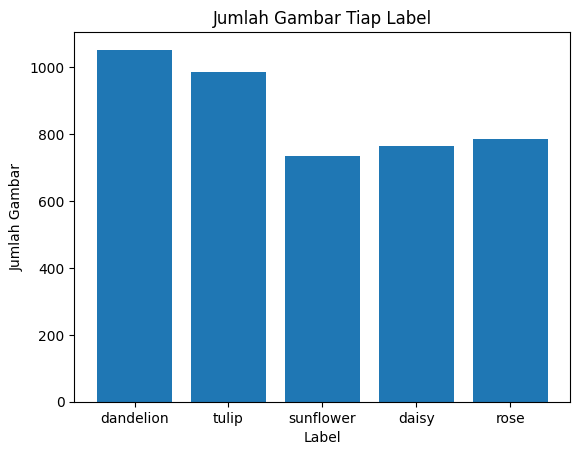

In [7]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

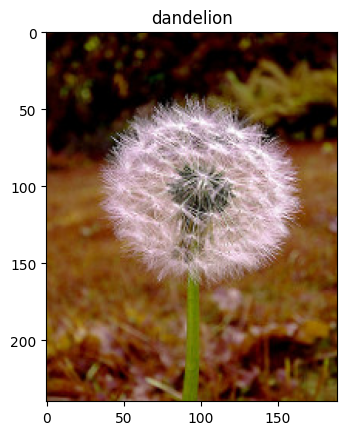

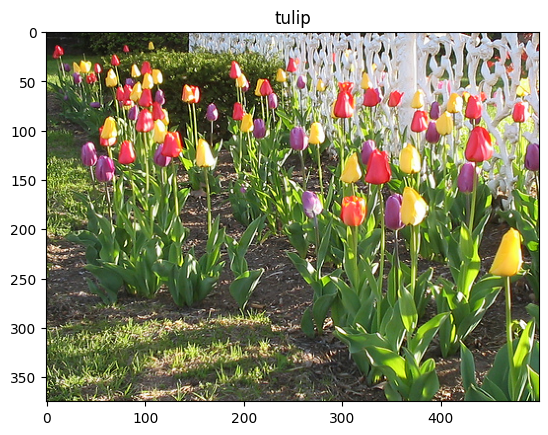

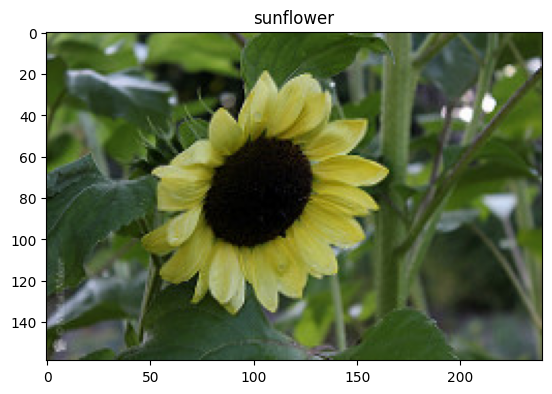

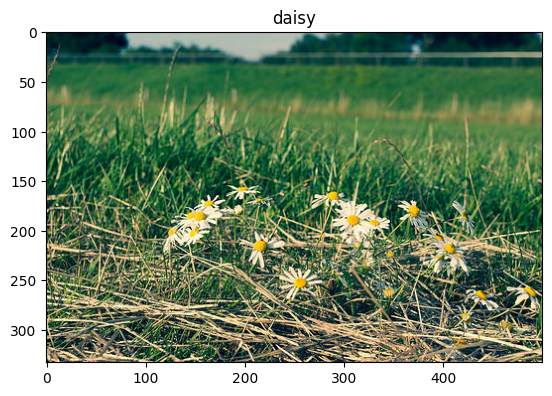

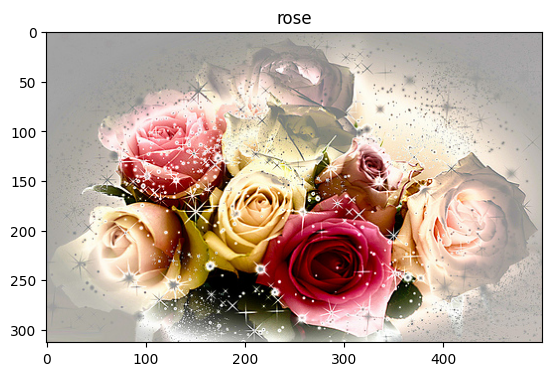

In [8]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [9]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999

In [10]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [14]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

In [15]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [16]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [17]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 29s 162ms/step - loss: 1.3296 - accuracy: 0.4064 - val_loss: 1.1148 - val_accuracy: 0.5663
Epoch 2/20
109/109 [==============================] - 16s 146ms/step - loss: 1.0893 - accuracy: 0.5704 - val_loss: 1.0458 - val_accuracy: 0.6023
Epoch 3/20
109/109 [==============================] - 18s 163ms/step - loss: 0.9843 - accuracy: 0.6182 - val_loss: 1.0061 - val_accuracy: 0.6093
Epoch 4/20
109/109 [==============================] - 16s 149ms/step - loss: 0.9105 - accuracy: 0.6456 - val_loss: 0.9789 - val_accuracy: 0.6279
Epoch 5/20
109/109 [==============================] - 18s 169ms/step - loss: 0.8460 - accuracy: 0.6723 - val_loss: 0.8946 - val_accuracy: 0.6593
Epoch 6/20
109/109 [==============================] - 16s 149ms/step - loss: 0.8249 - accuracy: 0.6856 - val_loss: 0.9380 - val_accuracy: 0.6419
Epoch 7/20
109/109 [==============================] - 16s 147ms/step - loss: 0.7868 - accuracy: 0.6879 - val_loss: 0.8687 - val_ac

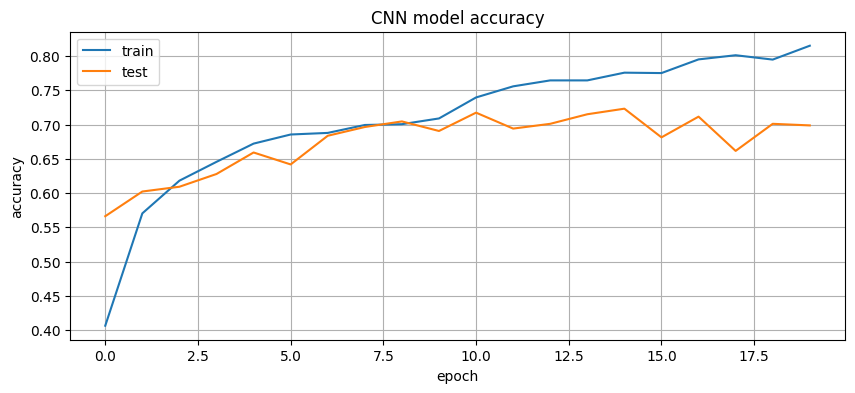

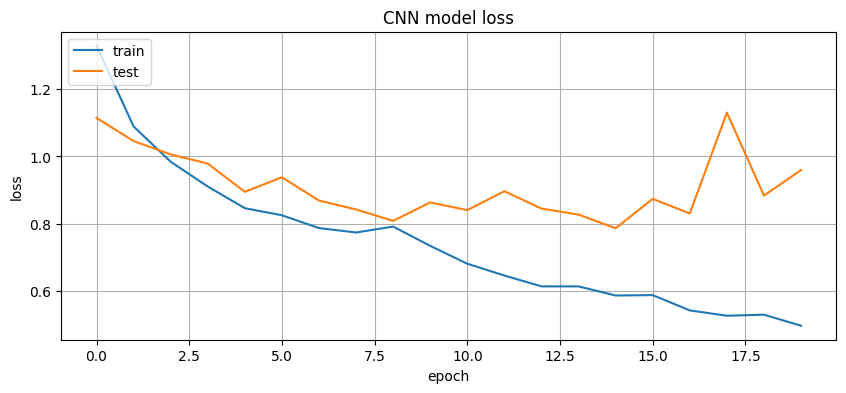

In [18]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [19]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

58889256/58889256 [==============================] - 3s 0us/step


In [20]:
# Melatih model VGG16
vgg_hist = vgg_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
109/109 [==============================] - 29s 213ms/step - loss: 1.0974 - accuracy: 0.5678 - val_loss: 0.7029 - val_accuracy: 0.7477
Epoch 2/10
109/109 [==============================] - 19s 177ms/step - loss: 0.7842 - accuracy: 0.7099 - val_loss: 0.6472 - val_accuracy: 0.7535
Epoch 3/10
109/109 [==============================] - 20s 180ms/step - loss: 0.7172 - accuracy: 0.7347 - val_loss: 0.5702 - val_accuracy: 0.7977
Epoch 4/10
109/109 [==============================] - 21s 193ms/step - loss: 0.6492 - accuracy: 0.7654 - val_loss: 0.5648 - val_accuracy: 0.7977
Epoch 5/10
109/109 [==============================] - 20s 182ms/step - loss: 0.6447 - accuracy: 0.7654 - val_loss: 0.5518 - val_accuracy: 0.8035
Epoch 6/10
109/109 [==============================] - 20s 183ms/step - loss: 0.6425 - accuracy: 0.7642 - val_loss: 0.5612 - val_accuracy: 0.8047
Epoch 7/10
109/109 [==============================] - 20s 180ms/step - loss: 0.6251 - accuracy: 0.7706 - val_loss: 0.5446 - val_ac

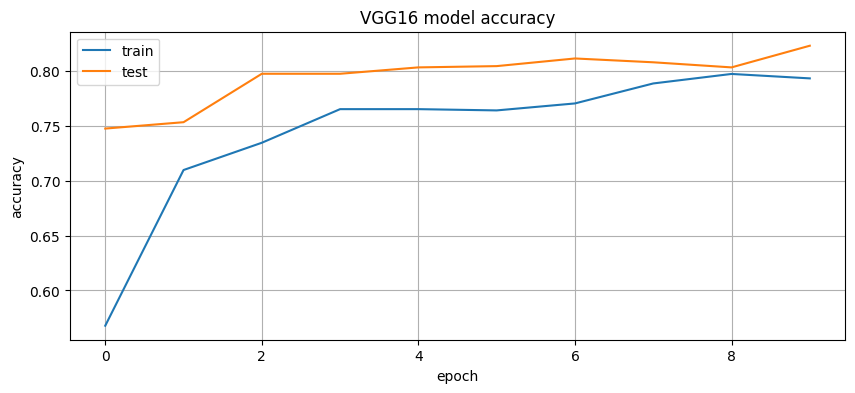

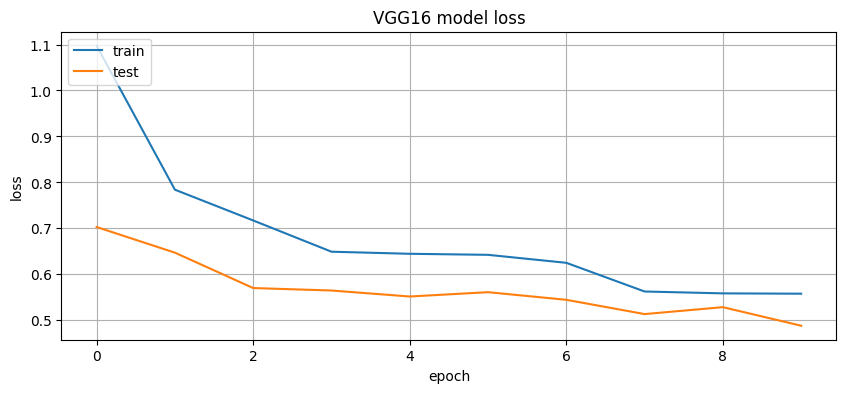

In [21]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [22]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

94765736/94765736 [==============================] - 5s 0us/step


In [23]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
109/109 [==============================] - 27s 189ms/step - loss: 1.6865 - accuracy: 0.2664 - val_loss: 1.5365 - val_accuracy: 0.3814
Epoch 2/10
109/109 [==============================] - 18s 168ms/step - loss: 1.5244 - accuracy: 0.3393 - val_loss: 1.9279 - val_accuracy: 0.2860
Epoch 3/10
109/109 [==============================] - 18s 162ms/step - loss: 1.5784 - accuracy: 0.3086 - val_loss: 1.4979 - val_accuracy: 0.3605
Epoch 4/10
109/109 [==============================] - 19s 178ms/step - loss: 1.4973 - accuracy: 0.3471 - val_loss: 1.5151 - val_accuracy: 0.3651
Epoch 5/10
109/109 [==============================] - 18s 164ms/step - loss: 1.4966 - accuracy: 0.3546 - val_loss: 1.4894 - val_accuracy: 0.3326
Epoch 6/10
109/109 [==============================] - 18s 165ms/step - loss: 1.5030 - accuracy: 0.3477 - val_loss: 1.4273 - val_accuracy: 0.3814
Epoch 7/10
109/109 [==============================] - 18s 165ms/step - loss: 1.4627 - accuracy: 0.3653 - val_loss: 1.3928 - val_ac

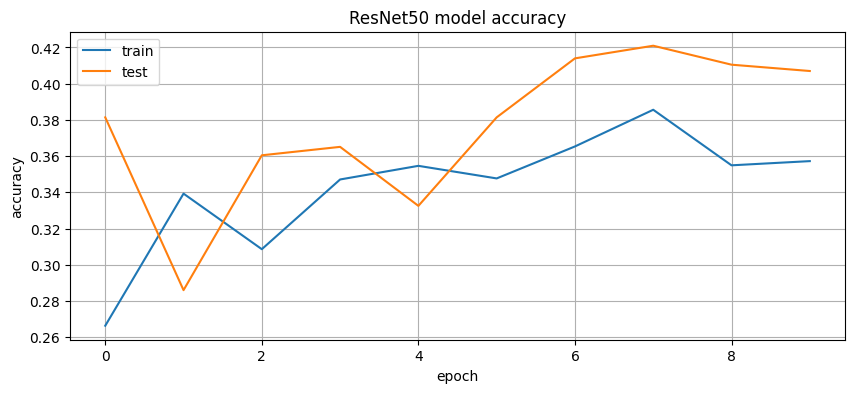

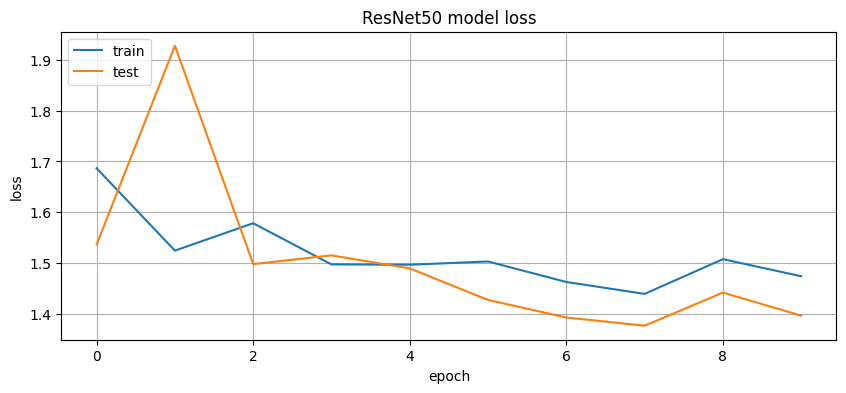

In [24]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [28]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 4s 0us/step


In [29]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [30]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 44s 261ms/step - loss: 0.8873 - accuracy: 0.6639 - val_loss: 0.4353 - val_accuracy: 0.8558
Epoch 2/20
109/109 [==============================] - 21s 190ms/step - loss: 0.5279 - accuracy: 0.8042 - val_loss: 0.4847 - val_accuracy: 0.8500
Epoch 3/20
109/109 [==============================] - 19s 178ms/step - loss: 0.4624 - accuracy: 0.8325 - val_loss: 0.4004 - val_accuracy: 0.8674
Epoch 4/20
109/109 [==============================] - 20s 185ms/step - loss: 0.3861 - accuracy: 0.8594 - val_loss: 0.3582 - val_accuracy: 0.8791
Epoch 5/20
109/109 [==============================] - 21s 189ms/step - loss: 0.3734 - accuracy: 0.8600 - val_loss: 0.3557 - val_accuracy: 0.8814
Epoch 6/20
109/109 [==============================] - 19s 177ms/step - loss: 0.3601 - accuracy: 0.8687 - val_loss: 0.3350 - val_accuracy: 0.8779
Epoch 7/20
109/109 [==============================] - 20s 181ms/step - loss: 0.3915 - accuracy: 0.8522 - val_loss: 0.3470 - val_ac

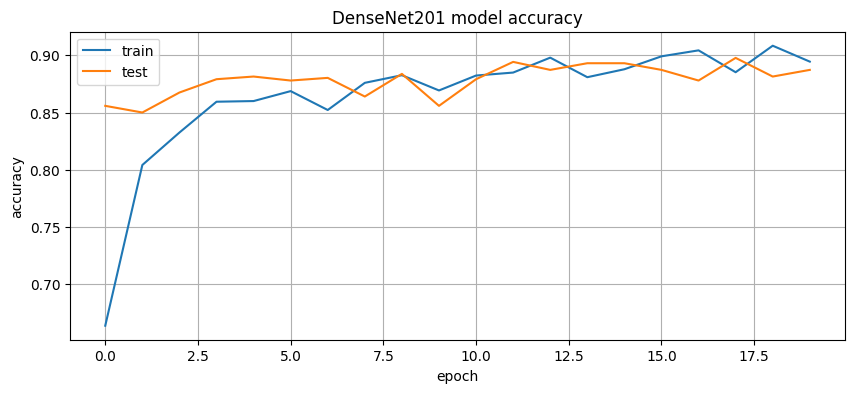

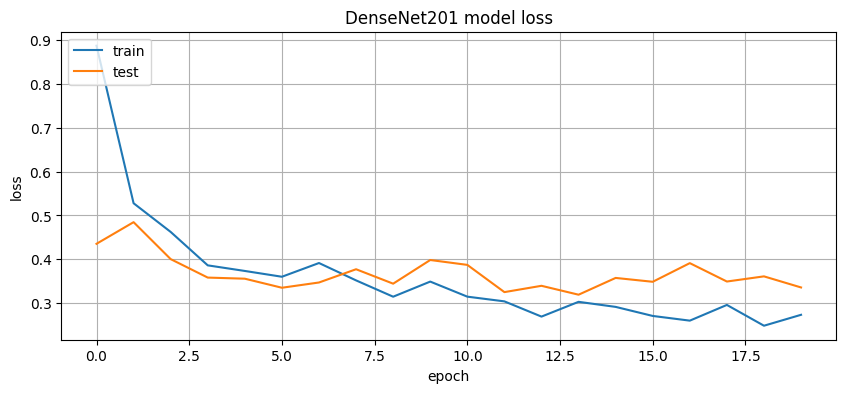

In [31]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

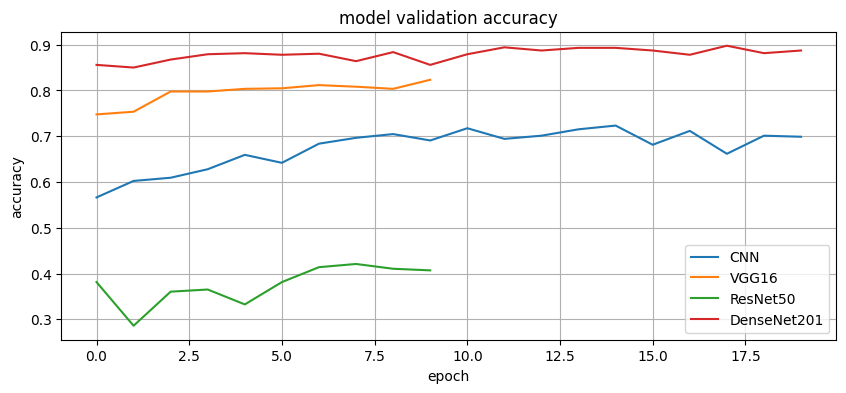

In [32]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()

In [26]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Saving 6953297_8576bf4ea3.jpg to 6953297_8576bf4ea3.jpg
1/1 [==============================] - 0s 202ms/step
6953297_8576bf4ea3.jpg
sunflower


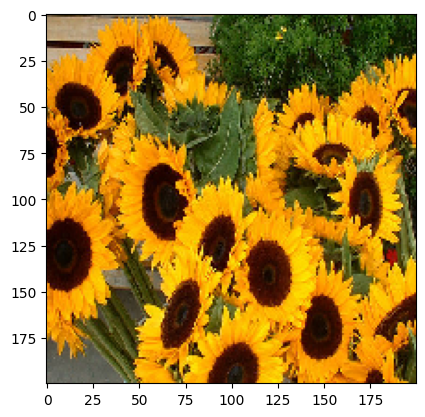

In [27]:
# Menguji coba model
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline


#file upload, kode di bawah in hanya bisa dijalankan di google colab dengan mengimport from google.colab import files. Silahkan kalian ganti kodingannya agar bisa upload di jupyter notebook masing-masing
#atau kalian langsung import file gambarnya langsung
uploaded = files.upload()

for fn in uploaded.keys():

  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = vgg_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('daisy')
  elif classes==1:
    print('dandelion')
  elif classes==2:
    print('rose')
  elif classes==3:
    print('sunflower')
  else:
    print('tulip')